Results of forward analysis (regression)


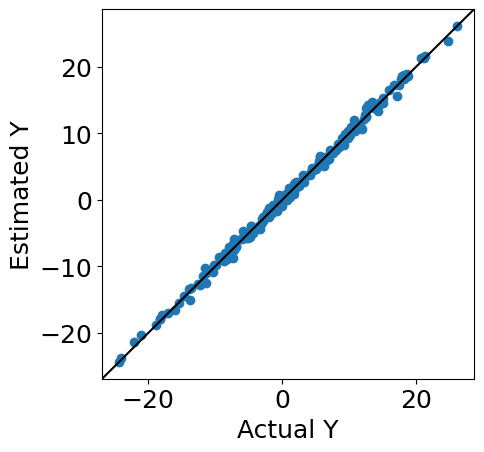

r2p: 0.9969749200047633
RMSEp: 0.5522131637563379
MAEp: 0.43731865270466747


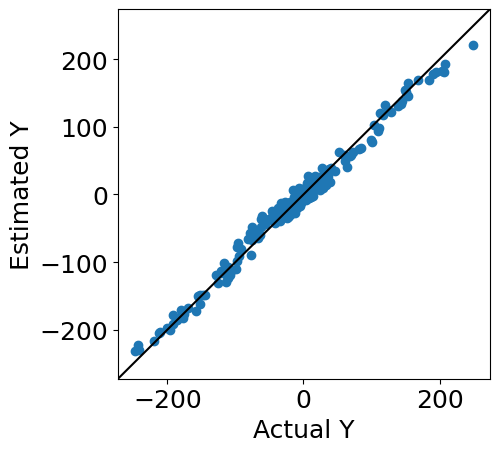

r2p: 0.9852556653581523
RMSEp: 11.329770284385232
MAEp: 9.240599565494161
---------------------------
Results of inverse analysis


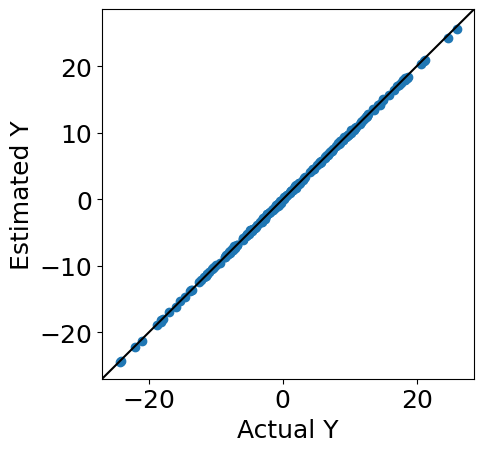

r2p: 0.9998127092811872
RMSEp: 0.13692095144462424
MAEp: 0.10334927019802041


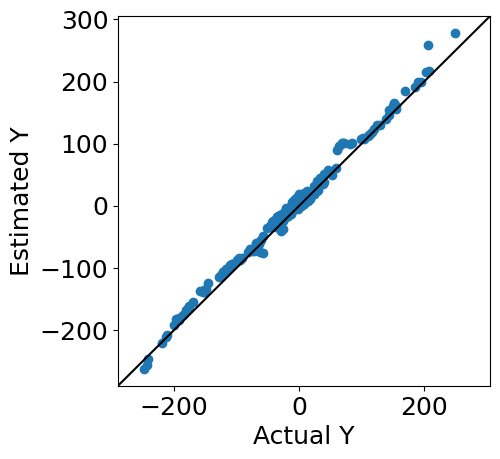

r2p: 0.9835534309550389
RMSEp: 11.965543781755684
MAEp: 9.621023145941091


In [1]:
# -*- coding: utf-8 -*- %reset -f
"""
@author: Hiromasa Kaneko
"""
# Demonstration of Gaussian Mixture Regression (GMR), which is supervised Gaussian Mixture Model (GMM)

import matplotlib.figure as figure
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from gmr import GMR
from sklearn.model_selection import train_test_split

# Settings
number_of_components = 9
covariance_type = 'full'  # 'full', 'diag', 'tied', 'spherical'
rep = 'mode'  # 'mode', 'mean'

number_of_all_samples = 500
number_of_test_samples = 200

numbers_of_x = [0, 1, 2]
numbers_of_y = [3, 4]

# Generate samples for demonstration
np.random.seed(seed=100)
x = np.random.rand(number_of_all_samples, 3) * 10 - 5
y1 = 3 * x[:, 0:1] - 2 * x[:, 1:2] + 0.5 * x[:, 2:3]
y2 = 5 * x[:, 0:1] + 2 * x[:, 1:2] ** 3 - x[:, 2:3] ** 2
y1 = y1 + y1.std(ddof=1) * 0.05 * np.random.randn(number_of_all_samples, 1)
y2 = y2 + y2.std(ddof=1) * 0.05 * np.random.randn(number_of_all_samples, 1)

variables = np.c_[x, y1, y2]
variables_train, variables_test = train_test_split(variables, test_size=number_of_test_samples, random_state=100)

# Standardize X and y
autoscaled_variables_train = (variables_train - variables_train.mean(axis=0)) / variables_train.std(axis=0, ddof=1)
autoscaled_variables_test = (variables_test - variables_train.mean(axis=0)) / variables_train.std(axis=0, ddof=1)

# GMR
model = GMR(n_components=number_of_components, covariance_type=covariance_type, rep=rep)
model.fit(autoscaled_variables_train)

# Forward analysis (regression)
predicted_y_test_all = model.predict_rep(autoscaled_variables_test[:, numbers_of_x], numbers_of_x, numbers_of_y)

# Inverse analysis
estimated_x_test_all = model.predict_rep(autoscaled_variables_test[:, numbers_of_y], numbers_of_y, numbers_of_x)

# Check results of forward analysis (regression)
print('Results of forward analysis (regression)')
plt.rcParams['font.size'] = 18
for y_number in range(len(numbers_of_y)):
    predicted_ytest = np.ndarray.flatten(predicted_y_test_all[:, y_number])
    predicted_ytest = predicted_ytest * variables_train[:, numbers_of_y[y_number]].std(ddof=1) + \
                      variables_train[:, numbers_of_y[y_number]].mean()
    # yy-plot
    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(variables_test[:, numbers_of_y[y_number]], predicted_ytest)
    y_max = np.max(np.array([np.array(variables_test[:, numbers_of_y[y_number]]), predicted_ytest]))
    y_min = np.min(np.array([np.array(variables_test[:, numbers_of_y[y_number]]), predicted_ytest]))
    plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
             [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-')
    plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))
    plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))
    plt.xlabel('Actual Y')
    plt.ylabel('Estimated Y')
    plt.show()
    # r2p, RMSEp, MAEp
    print('r2p: {0}'.format(float(1 - sum((variables_test[:, numbers_of_y[y_number]] - predicted_ytest) ** 2) / sum(
        (variables_test[:, numbers_of_y[y_number]] - variables_train[:, numbers_of_y[y_number]].mean()) ** 2))))
    print('RMSEp: {0}'.format(float((sum((variables_test[:, numbers_of_y[y_number]] - predicted_ytest) ** 2) / len(
        variables_test[:, numbers_of_y[y_number]])) ** 0.5)))
    print('MAEp: {0}'.format(float(sum(abs(variables_test[:, numbers_of_y[y_number]] - predicted_ytest)) / len(
        variables_test[:, numbers_of_y[y_number]]))))

# Check results of inverse analysis
print('---------------------------')
print('Results of inverse analysis')
estimated_X_test = estimated_x_test_all * np.matlib.repmat(variables_train[:, numbers_of_x].std(ddof=1, axis=0), estimated_x_test_all.shape[0], 1) + \
                   np.matlib.repmat(variables_train[:, numbers_of_x].mean(axis=0), estimated_x_test_all.shape[0], 1)
calculated_Y_from_estimated_X_test = np.empty([number_of_test_samples, 2])
calculated_Y_from_estimated_X_test[:, 0:1] = 3 * estimated_X_test[:, 0:1] - 2 * estimated_X_test[:, 1:2] \
                                             + 0.5 * estimated_X_test[:, 2:3]
calculated_Y_from_estimated_X_test[:, 1:2] = 5 * estimated_X_test[:, 0:1] + 2 * estimated_X_test[:, 1:2] ** 3 \
                                             - estimated_X_test[:, 2:3] ** 2
for y_number in range(len(numbers_of_y)):
    predicted_ytest = np.ndarray.flatten(calculated_Y_from_estimated_X_test[:, y_number])
    # yy-plot
    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(variables_test[:, numbers_of_y[y_number]], predicted_ytest)
    y_max = np.max(np.array([np.array(variables_test[:, numbers_of_y[y_number]]), predicted_ytest]))
    y_min = np.min(np.array([np.array(variables_test[:, numbers_of_y[y_number]]), predicted_ytest]))
    plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
             [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-')
    plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))
    plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))
    plt.xlabel('Actual Y')
    plt.ylabel('Estimated Y')
    plt.show()
    # r2p, RMSEp, MAEp
    print('r2p: {0}'.format(float(1 - sum((variables_test[:, numbers_of_y[y_number]] - predicted_ytest) ** 2) / sum(
        (variables_test[:, numbers_of_y[y_number]] - variables_test[:, numbers_of_y[y_number]].mean()) ** 2))))
    print('RMSEp: {0}'.format(float((sum((variables_test[:, numbers_of_y[y_number]] - predicted_ytest) ** 2) / len(
        variables_test[:, numbers_of_y[y_number]])) ** 0.5)))
    print('MAEp: {0}'.format(float(sum(abs(variables_test[:, numbers_of_y[y_number]] - predicted_ytest)) / len(
        variables_test[:, numbers_of_y[y_number]]))))